Epoch 1/10
750/750 [==============================] - 13s 16ms/step - loss: 0.5632 - accuracy: 0.7943 - val_loss: 0.3878 - val_accuracy: 0.8610
Epoch 2/10
750/750 [==============================] - 12s 16ms/step - loss: 0.3558 - accuracy: 0.8711 - val_loss: 0.3205 - val_accuracy: 0.8872
Epoch 3/10
750/750 [==============================] - 12s 16ms/step - loss: 0.3024 - accuracy: 0.8879 - val_loss: 0.2911 - val_accuracy: 0.8949
Epoch 4/10
750/750 [==============================] - 12s 17ms/step - loss: 0.2684 - accuracy: 0.9013 - val_loss: 0.2874 - val_accuracy: 0.8953
Epoch 5/10
750/750 [==============================] - 13s 17ms/step - loss: 0.2449 - accuracy: 0.9098 - val_loss: 0.2656 - val_accuracy: 0.9036
Epoch 6/10
750/750 [==============================] - 11s 15ms/step - loss: 0.2237 - accuracy: 0.9168 - val_loss: 0.2716 - val_accuracy: 0.9038
Epoch 7/10
750/750 [==============================] - 12s 16ms/step - loss: 0.2029 - accuracy: 0.9244 - val_loss: 0.2810 - val_accuracy:

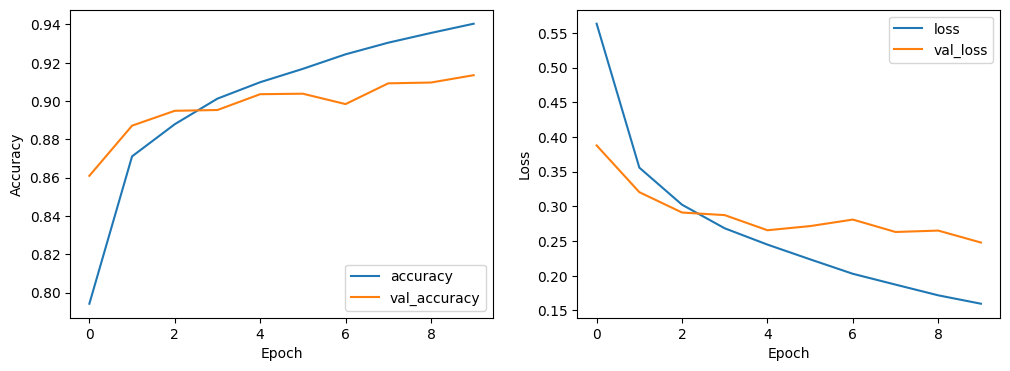

In [2]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
import warnings
import logging

logging.getLogger('tensorflow').setLevel(logging.ERROR)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=UserWarning)
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)


# Load the Fashion MNIST dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize the dataset
x_train, x_test = x_train / 255.0, x_test / 255.0

# Reshape the data for the neural network
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Define the model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')

# Plot accuracy and loss over time
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.show()
